# Code Performance Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sdfec_client

%matplotlib inline

### Hardware Setup

In [2]:
client = sdfec_client.SDFECClient("http://localhost:8230/api")

In [3]:
client.status;

In [4]:
docsis_medium_code_id, docsis_medium_code = client.add_code("docsis_31_medium.yml")

### Hardware Simulation

In [ ]:
# snrs = np.linspace(6, 8, (8-6)*4, endpoint=False)
snrs = [7.0]
docsis_medium_results_base = client.simulate(docsis_medium_code_id, snrs, snr_scales=np.ones_like(snrs), term_time=(60*8*60), term_errors=1e4, max_iterations=32, collect_last_failed=1024*64).wait_progress()

In [5]:
snrs = np.linspace(3, 8, (8-3)*4, endpoint=False)
# snrs = [7.0]
docsis_medium_results_two = client.simulate(docsis_medium_code_id, snrs, snr_scales=4*np.ones_like(snrs), term_time=(10), term_errors=1e4, max_iterations=32).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='00:00:00', max=1.0)

In [6]:
# snrs = np.linspace(6, 8, (8-6)*4, endpoint=False)
snrs = [7.0]
docsis_medium_results = client.simulate(docsis_medium_code_id, snrs, snr_scales=np.ones_like(snrs)*4, term_time=(60*8*60), term_errors=1e4, max_iterations=32, collect_last_failed=1024*64).wait_progress()

[SDFEC: task=b43703714d064b95d5ca05452389cf9a] NOTE: Initializing LDPC code definitions from file...
[SDFEC: task=b43703714d064b95d5ca05452389cf9a] NOTE: Code number: 0 -> no_id 


FloatProgress(value=0.0, bar_style='info', description='00:00:00', max=1.0)

KeyboardInterrupt: 

In [6]:
protograph15_girth6_code_id,protograph15_girth6_code = client.add_code("try_protograph15_girth6.QCldpc")

In [7]:
snrs = np.linspace(3, 8, (8-3)*4, endpoint=False)
protograph15_girth6_results = client.simulate(protograph15_girth6_code_id, snrs, snr_scales=4*np.ones_like(snrs), term_time=(10), term_errors=1e4, max_iterations=32).wait_progress()

snrs = [7.0]
protograph15_girth6_7db_fails_results = client.simulate(protograph15_girth6_code_id, snrs, snr_scales=4*np.ones_like(snrs), term_time=(8*60*60), term_errors=1e4, max_iterations=32, collect_last_failed=64*1024).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='00:00:00', max=1.0)

[SDFEC: task=e63fec3eb04530c4eddb3bb4a8717a3a] NOTE: Initializing LDPC code definitions from file...
[SDFEC: task=e63fec3eb04530c4eddb3bb4a8717a3a] NOTE: Code number: 0 -> no_id 


FloatProgress(value=0.0, bar_style='info', description='00:00:00', max=1.0)

Processing 3950 blocks in local cmodel:


FloatProgress(value=0.0, bar_style='info', description='3950', max=1.0)

Passed: 0 / 3950


In [27]:
def plot_failures(results, a, b, c, d):
    # docsis medium: a=99, b=51, c=108, d=55
    bit_errors = results.failed_info_words[0].copy()
    bit_errors.resize(a*b)
    bit_errors = bit_errors
    code_words = results.failed_code_words[0]

    plt.figure(figsize=(26, 12))
    # plt.suptitle("Accumulated code and info-words", fontsize=14)

    plt.subplot(2, 2, 1)
    plt.title("Codeword LLR Sum (Pre-Decoder)")
    plt.imshow(code_words.reshape(c,d).T)
    plt.colorbar()

    plt.subplot(2, 2, 2)
    plt.title("Bit errors (Post-Decoder)")
    plt.imshow(bit_errors.reshape(a,b).T)
    plt.colorbar()

    plt.subplot(2, 2, (3,4))
    plt.title("Codeword LLR Sum (Pre-Decoder)")
    plt.plot(code_words)
    plt.grid()


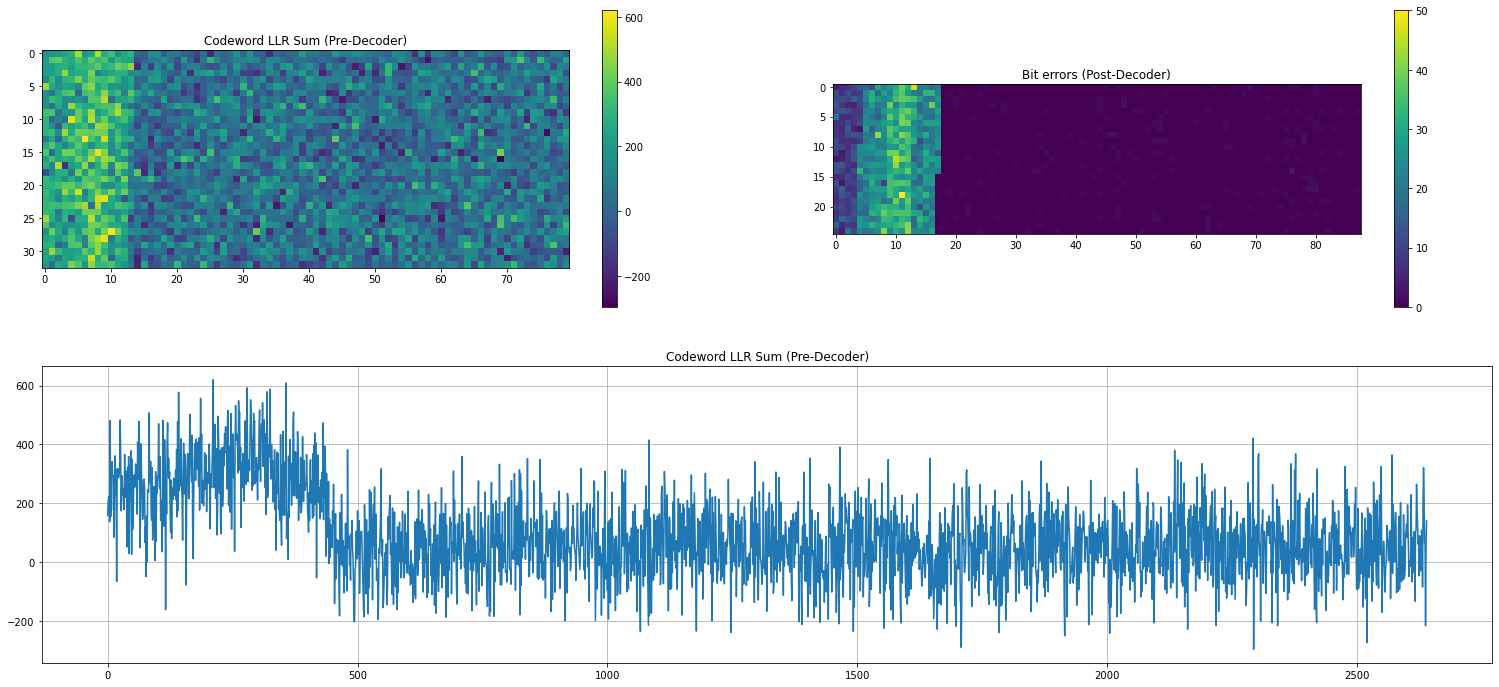

In [28]:
plot_failures(protograph15_girth6_7db_fails_results, 88, 25, 80, 33)

In [24]:
protograph15_girth6_7db_fails_results.fers

array([3.36416076e-08])

In [16]:
print("BER:", docsis_medium_results_base.bers[0], "->", docsis_medium_results.bers[0])
print("FER:", docsis_medium_results_base.fers[0], "->", docsis_medium_results.fers[0])

BER: 1.5317564107518045e-12 -> 1.5317564107518045e-12
FER: 1.3615156876418458e-06 -> 1.3615156876418458e-06


In [17]:
docsis_medium_results.failed_code_words[0].shape

(5940,)

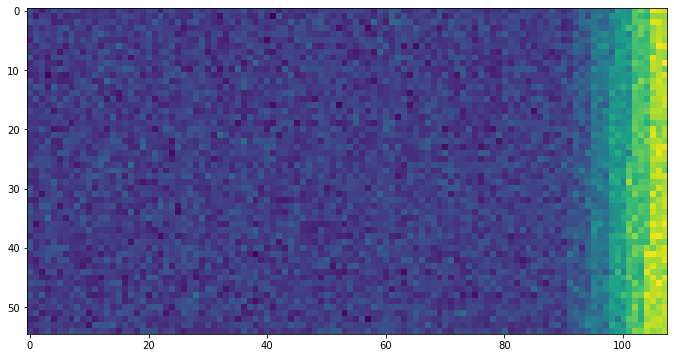

In [18]:
code_words = docsis_medium_results.failed_code_words[0]

plt.figure(figsize=(20, 6))
plt.imshow(code_words.reshape(108,55).T)

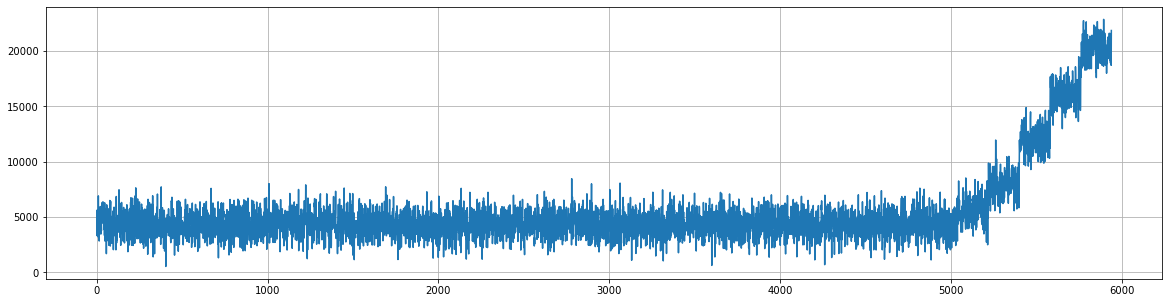

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(code_words)
plt.grid()

In [27]:
[([len(v) for v in u]) for u in docsis_medium_results.data["last_failed"]]

[[42, 62, 58, 60, 67, 60]]

In [26]:
# Reference Data from Xilinx

docsis_medium_ref = np.array([[3, 0.09314376984126985],
 [3.25, 0.08651821428571428],
 [3.5, 0.07991150793650793],
 [3.75, 0.07338222222222222],
 [4, 0.06675714285714286],
 [4.25, 0.06019753968253969],
 [4.5, 0.05342152777777778],
 [4.75, 0.04613039682539682],
 [5, 0.03792646825396825],
 [5.25, 0.02457871031746032],
 [5.5, 0.00533875],
 [5.75, 0.0001281459435626102],
 [6, 2.150350329607709e-07],
 [6.25, 4.861353862662688e-10],
 [6.5, 2.141238513541631e-10],
 [6.75, 9.516413426099798e-11]])

## Results

In [19]:
def plot_results(name, results, term_time, term_errors, max_iterations, requested_failures, ref=None):
    code = results.code
    
    fig, ((ax1,ax5,ax2),(ax3,ax4,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3)
    fig.subplots_adjust(top=0.92)

    fig.suptitle(name, fontsize=20)

    fig.set_size_inches(20, 20)
    #######################
    
    ax1.set_title("BER Curve")
    ax1.set_yscale("log")

    ax1.plot(results.ebn0s, results.bers, "rx")
    if ref is not None:
        ax1.plot(ref[:,0] + result.ebn0_offset, ref[:,1], "bx")

    ax1.set_xlabel("$E_b/N_0$ / dB")
    ax1.set_ylabel("BER")

    ax1.legend(["Simulation", "Reference"])

    ax1.grid()

    #######################
    ax5.set_title("FER Curve")
    ax5.set_yscale("log")

    ax5.plot(results.ebn0s, np.array(results.failed_blocks) / np.array(results.finished_blocks), "rx")
    # ax1.plot(docsis_medium_ref[:,0], docsis_medium_ref[:,1], "bx")

    ax5.set_xlabel("$E_b/N_0$ / dB")
    ax5.set_ylabel("FER")

    # ax5.legend(["Simulated"])

    ax5.grid()
    
    ##############
    ax2.set_title("Simulation Speed")

    ax2.plot(results.snrs, results.speeds, "b")
    ax2.hlines(400e6*16*6, results.snrs[0], results.snrs[-1], "r")

    ax2.set_xlabel("SNR / dB")
    ax2.set_ylabel("Codeword Bits/s")

    ax2.legend(["Simulation", "Max Speed"])

    ax2.grid()

    ##############
    ax3.set_title("Code bits simulated")
    ax3.set_yscale("log")

    ax3.plot(results.snrs, np.array(results.finished_blocks) * code.n, "g")
    ax3.hlines(400e6*6*16*term_time, results.snrs[0], results.snrs[-1], "r")

    ax3.set_xlabel("SNR / dB")
    ax3.set_ylabel("Codeword Bits")

    ax3.legend(["Simulation", "Termination criterion at max speed"])
    ax3.grid()

    ##############
    ax4.set_title("Total bit errors")
    ax4.set_yscale("log")

    ax4.plot(results.snrs, results.bit_errors, "c")
    ax4.hlines(term_errors, results.snrs[0], results.snrs[-1], "r")

    ax4.set_xlabel("SNR / dB")
    ax4.set_ylabel("Bits")

    ax4.legend(["Simulation", "Termination Criterion"])
    ax4.grid()

    ##############
    ax6.set_title("Average Decoder Iterations")
    ax6.plot(results.snrs, results.avg_iterations)

    ax6.hlines(max_iterations, results.snrs[0], results.snrs[-1], "r")

    ax6.set_xlabel("SNR / dB")
    ax6.set_ylabel("Iterations")

    ax6.grid()
    ax6.legend(["Simulation", "Max Iterations"])

    #################

    ax7.set_title("Captured Failures")
    ax7.plot(results.snrs, [sum([len(u) for u in v]) for v in results.data["last_failed"]])
    ax7.hlines(requested_failures*6, results.snrs[0], results.snrs[-1], "r")

    ax7.set_xlabel("SNR / dB")
    ax7.set_ylabel("Captured Failures")

    ax7.grid()
    ax7.legend(["Simulation", "Requested"])
    #################
    
    ax8.set_title("Failed Blocks")
    ax8.plot(results.snrs, results.failed_blocks, "-x")
    ax8.set_xlabel("SNR / dB")
    ax8.set_ylabel("Failed Blocks")
    ax8.set_yscale("log")
    ax8.grid()
    ax8.legend(["Simulation"])
    #################
    
    ax9.set_title(f"Failed block process, SNR={results.snrs[0]:.1f} dB")
    for v in results.data["last_failed"][0]:
        ax9.step(v, np.arange(len(v)))
    
    ax9.set_xlabel("Block ID")
    ax9.set_ylabel("Cumulative captured failures")
    ax9.grid()

In [1]:
plot_results("DOCSIS 3.1, Medium", docsis_medium_code, docsis_medium_results_two, 10, 1e4, 32, 0, docsis_medium_ref)

NameError: name 'plot_results' is not defined

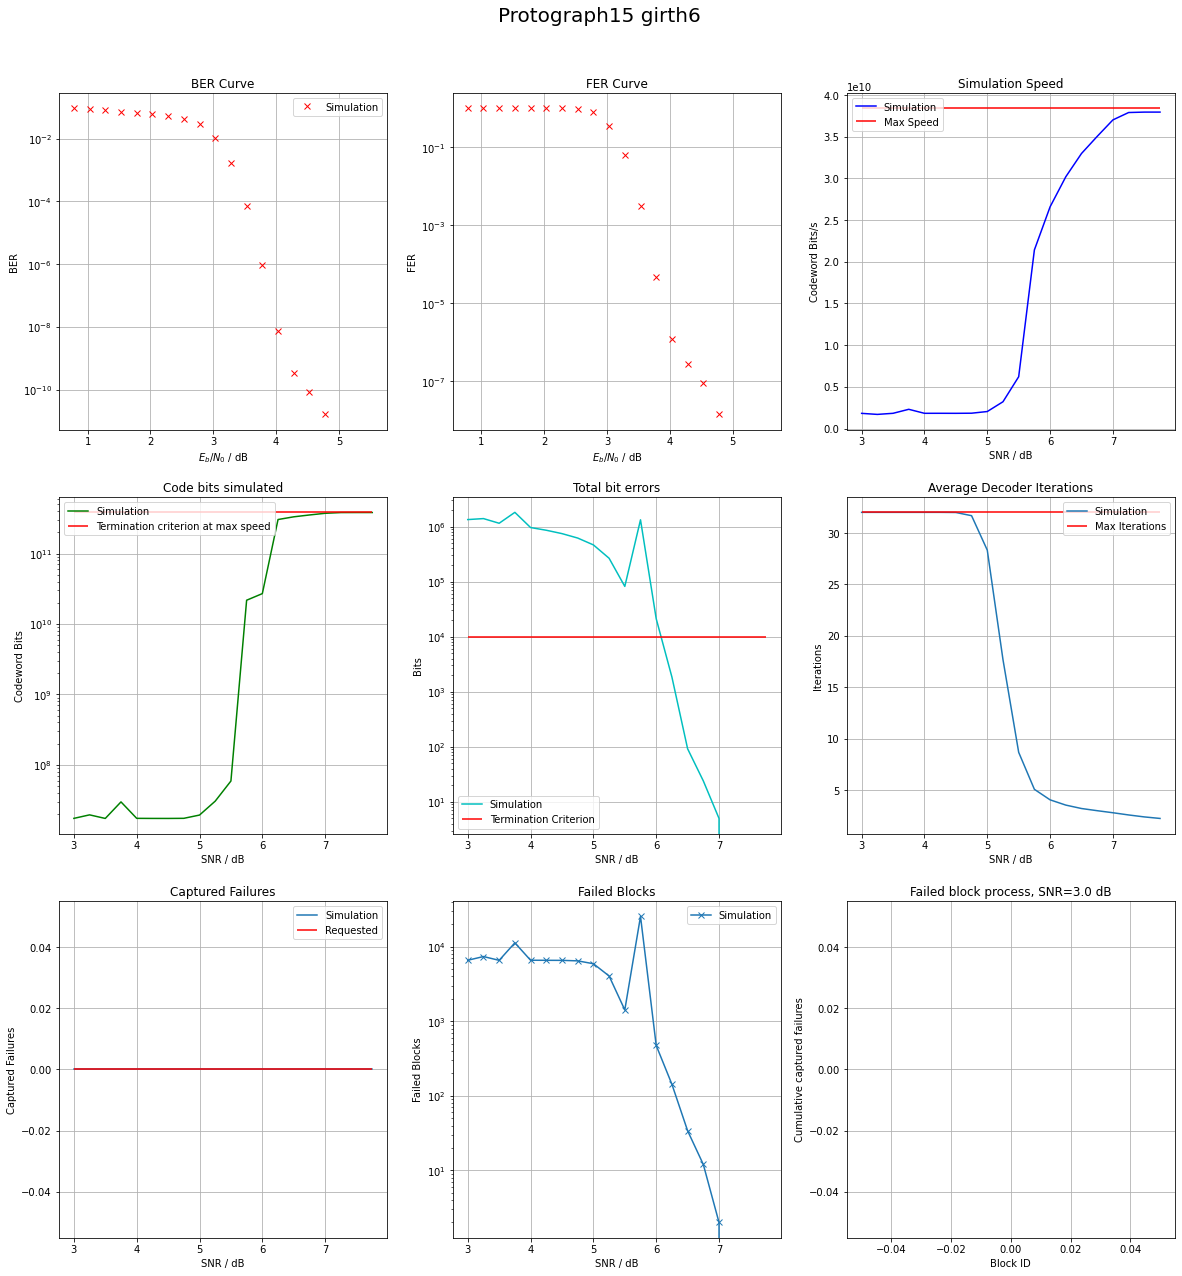

In [20]:
plot_results("Protograph15 girth6", protograph15_girth6_results, 10, 1e4, 32, 0)

In [12]:
print(protograph15_girth6_7db_fails_results.failed_info_words[0].sum(), "==", protograph15_girth6_7db_fails_results.bit_errors[0])

10002 == 10002


In [13]:
protograph15_girth6_7db_fails_results.finished_blocks[0] / 1e11

1.19613214332

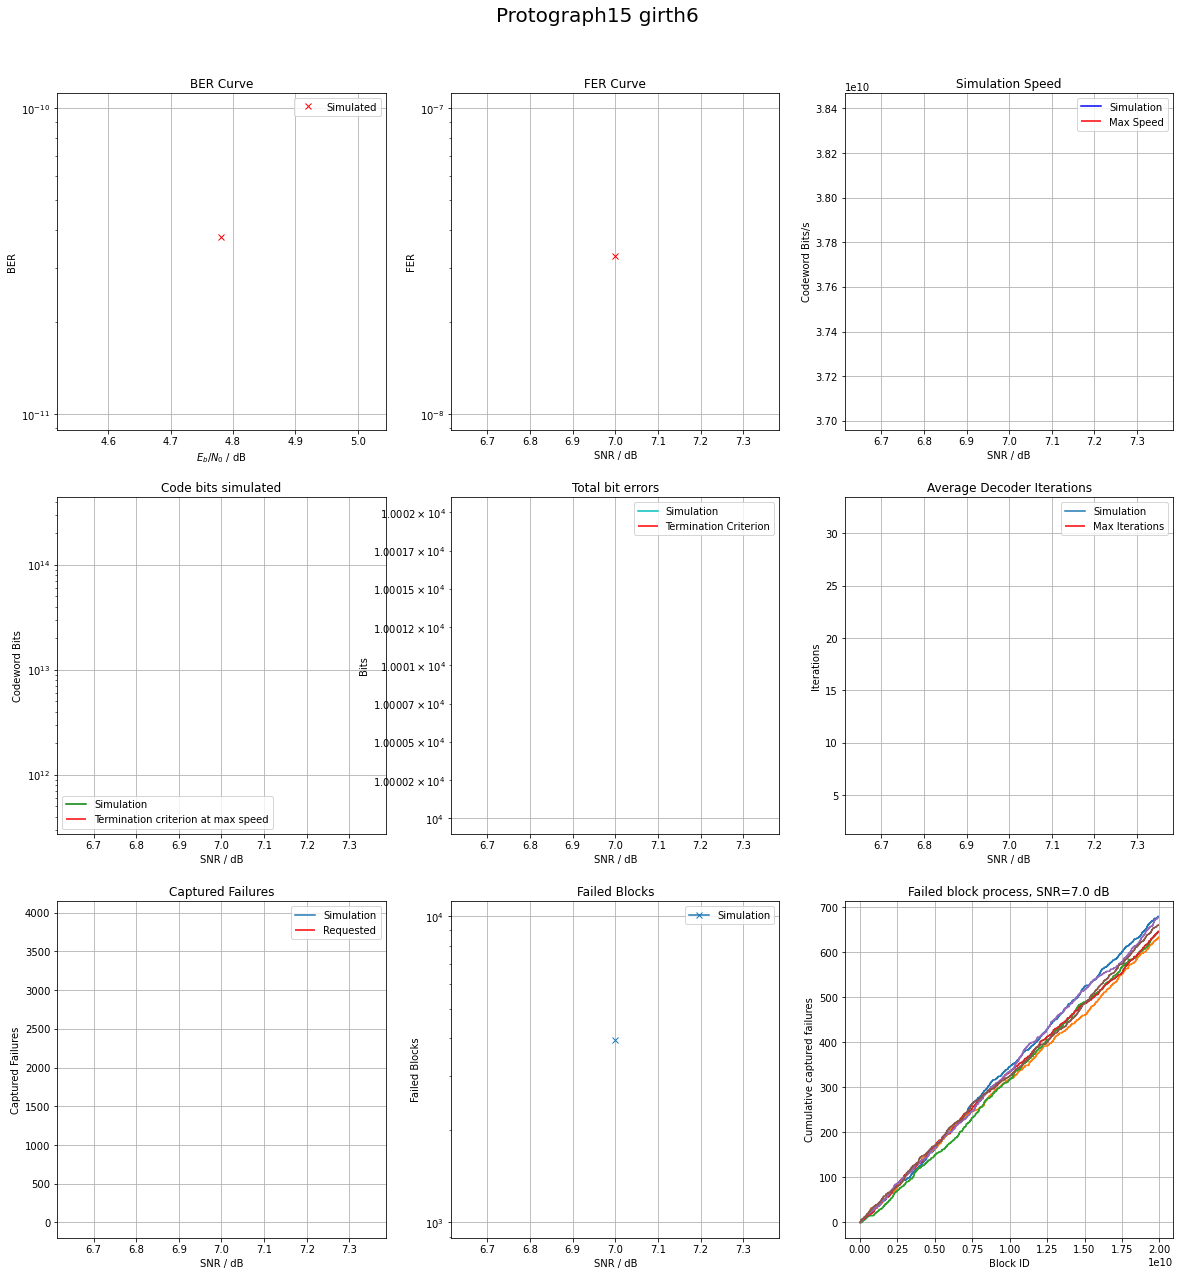

In [14]:
plot_results("Protograph15 girth6", protograph15_girth6_7db_fails_results, 10, 1e4, 32, 0)

In [15]:
for v in docsis_medium_results.data["last_failed"][0]:
    plt.step(v, np.arange(len(v)))

NameError: name 'docsis_medium_results' is not defined

In [52]:
simulated_codword_bits = np.array(docsis_medium_results.finished_blocks).sum()*code.n
print(f"For these results, in total {simulated_codword_bits:e} codeword bits were simulated!")

NameError: name 'docsis_medium_results' is not defined